<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title"><b>Semantic Segmentation by Linear Programming</b></span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://mate.unipv.it/gualandi" property="cc:attributionName" rel="cc:attributionURL">Stefano Gualandi</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.<br />Based on a work at <a xmlns:dct="http://purl.org/dc/terms/" href="https://github.com/mathcoding/opt4ds" rel="dct:source">https://github.com/mathcoding/opt4ds</a>.

**NOTE:** Run the following script whenever running this script on a Google Colab.

In [ ]:
import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("glpk") or os.path.isfile("glpk")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq glpk-utils
    else:
        try:
            !conda install -c conda-forge glpk 
        except:
            pass

**REMARK:** If working on your personal computer, you might want to install [Gurobi with an academic license](https://www.gurobi.com/academia/academic-program-and-licenses/). Gurobi is a commercial solver that is extremely fast in solving large ILP instances, much more faster than the free GLPK solver.

# 6. Semantic Segmentation by Linear Programming
Semantic segmentation is computer vision task that assign to each pixel of a given image a label, as for instance, a 0 or 1 value. While this is nowadays a task solved very well by modern neural networks architectures, it is possible to reason about basic models by using Integer Linear Programming. This type of approach will not likely scale to the size of the input, but it can help to reason about the semantic segmentation models.

## 6.1 Graph model of an image
The first step in a segmentation task is to pass to a particular graph representation of an image.

If the input image has dimension $n \times m$, we build a graph $G=(V, E)$ with $n \times m$ nodes.

The number of edges depends on the type of model we want to use, but we can begin with considering a complete graph with $E = V \times V \setminus \{i,i\}$. Each edge $\{i,j\}$ of the graph has a weight $w_{ij} = || p_i - p_j ||$, where $p_i \in \mathbb{R}^2$ for black and white images, and $p_i \in \mathbb{R}^3$ for color images.

Notice that the weight encode a measure of similuted between a pair of pixels.

Complete the following snippet:

In [15]:
import networkx as nx

def FromImage2Graph(A):
    w, h = A.shape

    G = nx.Graph()

    # TODO: Build the graph ....

    return G

## 6.2 Graph cut
Given the weighted graph model of an image, we want to partition the node of the graph into two disjoint clusters $S_1, S_2$ such that the sum of the distances among the nodes in the same cluster is minimal, that is

$$
    \min_{S_1, S_2} \sum_{i,j \in S_1} w_{ij} + \sum_{i,j \in S_2} w_{ij} 
$$

or equivalently, we want to maximize the weight of the edges going from $S_1$ to $S_2$

$$
\max_{S_1, S_2} \sum_{i \in S_1, j \in S_2} w_{ij}
$$

Note the $S_1 \cup S_2 = N$ and $S_1 \cap S_2 = \emptyset$.

## 6.3 Downsampling a black and white image
When working with images and protopying models, it is convient to downsample an image to a lower resolution.

While you can find several python libraries, the downsampling of a white image should be a basic Python exercise.

In [13]:
# TODO: complete the following downsampling function

def Resample(A, n=16):
    w, h, _ = A.shape

    # TODO: complete the exercise
    # ...
    
    B = np.zeros( (n,n) )
    return B

## 6.4 Integer Linear Programming model

**EXERCISE:** write an Integer Linear Programming (ILP) model with Pyomo that can partition an image into two clusters, that is, we must map each pixel of the input image either to value 0 or 1.


In [22]:
# TO COMPLETE WITH YUOR MODEL
def Segmentation(G):

    # Dummy examples
    C = np.zeros( (20,10) )

    return C

You can test you model using the following lines of code.

(512, 512, 4)


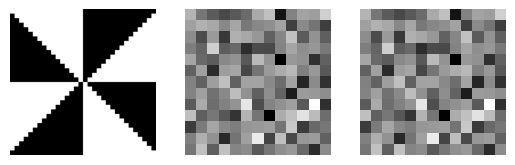

In [25]:
    A = LoadImage('../data/picture32_1009.png')
    print(A.shape)

    B = Resample(A, 13)
    B = AddNoise(B, 0.1)
    G = FromImage2Graph(B)

    ShowImages(A, B, B)
    
    sol = Segmentation(G)

    # Elaborate the solution into an image C
    # ShowImages(A, B, C)

## 6.5 Auxiliary functions
The following functions might be useful to write your solution approach.

In [2]:
# Load an image from file
def LoadImage(filename):
    A = plt.imread(filename).astype(np.float64)
    return A

In [3]:
# Add a lognormal noise to the image (to be used as a stress test)
def AddNoise(A, mu=0.2):
    n,m = A.shape

    for i in range(n):
        for j in range(m):
            A[i,j] = A[i,j] + np.random.lognormal(sigma=mu)

    return A

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Show a single image
def ShowImage(A):
    fig, ax = plt.subplots()

    plt.imshow(A)
    ax.autoscale()
    ax.set_aspect('equal', 'box')
    plt.axis('off')
    plt.show()

In [5]:
# Show three images in a row
def ShowImages(A, B, C):
    fig, ax = plt.subplots(1,3)

    ax[0].imshow(A, cmap='binary')
    ax[0].autoscale()
    ax[0].set_aspect('equal', 'box')
    ax[0].axis('off')

    ax[1].imshow(B, cmap='binary')
    ax[1].autoscale()
    ax[1].set_aspect('equal', 'box')
    ax[1].axis('off')

    ax[2].imshow(C, cmap='binary')
    ax[2].autoscale()
    ax[2].set_aspect('equal', 'box')
    ax[2].axis('off')

    plt.show()